In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


In [ ]:
csv_file_name = "fertility.csv"


In [ ]:
df = pd.read_csv("fertility.csv")
df.head(5)

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In this dataset the primary objective is to predict if the digonosis is altered or not .
So the target_column_name is `"Diagonosis"`

In [ ]:
target_column_name = "Diagnosis"

 If categorical then set the `categorical_target_column`variable to `True` . Otherwise set the value to `False'


In [ ]:
categorical_target_column = True
#categorical_target_column = False


In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 100
Total Number of Columns : 10


In [ ]:
if "Diagnosis" in df:
    print(df["Diagnosis"].value_counts())


Normal     88
Altered    12
Name: Diagnosis, dtype: int64


OBSERVATION

---

There are total 100 data points in this dataset . Among which 88 data points belong to class "0" (Normal) and other 12 data points belong to class "1" (Altered) .
This indicates that in the dataset the data points are not equally distributed among the classes.

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

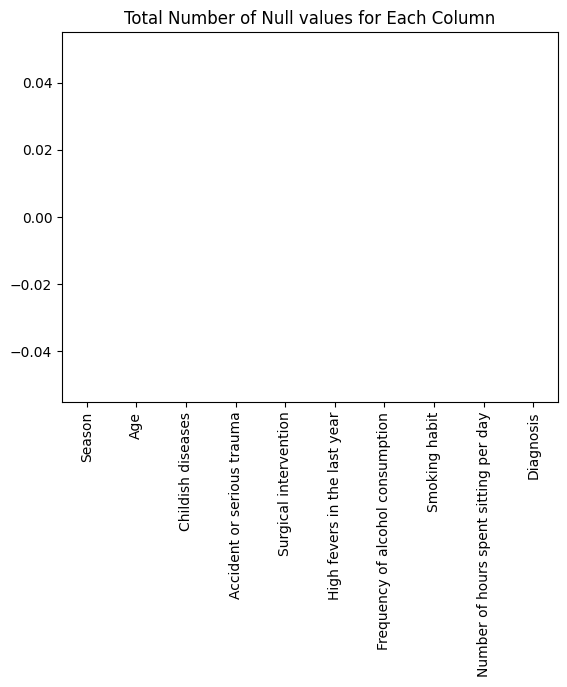

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


In [ ]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


Season                                   0.0
Age                                      0.0
Childish diseases                        0.0
Accident or serious trauma               0.0
Surgical intervention                    0.0
High fevers in the last year             0.0
Frequency of alcohol consumption         0.0
Smoking habit                            0.0
Number of hours spent sitting per day    0.0
Diagnosis                                0.0
dtype: float64

OBSERVATION



I won't consider of dropping any columns as there is no missing values and null values.

In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    99.0
True      1.0
dtype: float64


OBSERVATION

---
There are 0.1% duplicate entries in this data set


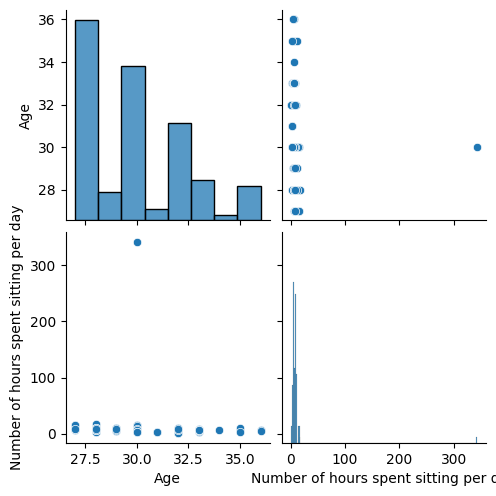

In [ ]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

OBSERVATION

---
From the pair plot above some of the observations are :-   

1.    **Age** : From the histogram analysis it can be observed that the graph is right skewed . Also , mentionably high number at age 30s .

2.   **Fare** : In this dataset the data points from `Number of hours sitting per day` column are highly right skewed. It can be observed that Most of the male are sitting from 0-10 hours

3.  **Age and bumber of hours sitting per day** : Male whose age are 30 most likely spend more time sitting.






In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-null    object
 6   Frequency of alcohol consumption       100 non-null    object
 7   Smoking habit                          100 non-null    object
 8   Number of hours spent sitting per day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


-----------------Unique Values per colum

Season                                    4
Age                                      10
Childish diseases                         2
Accident or serious trauma                2
Surgical intervention                     2
High fevers in the last year              3
Frequency of alcohol consumption          5
Smoking habit                             3
Number of hours spent sitting per day    14
Diagnosis                                 2
dtype: int64

In [ ]:
categorical_columns = ["Season" , "Childish diseases" , "Accident or serious trauma" ,"Surgical intervention","High fevers in the last year" ,"Smoking habit" , "Diagnosis"]
numeric_columns = [ "Age" , "Number of hours spent sitting per day"]

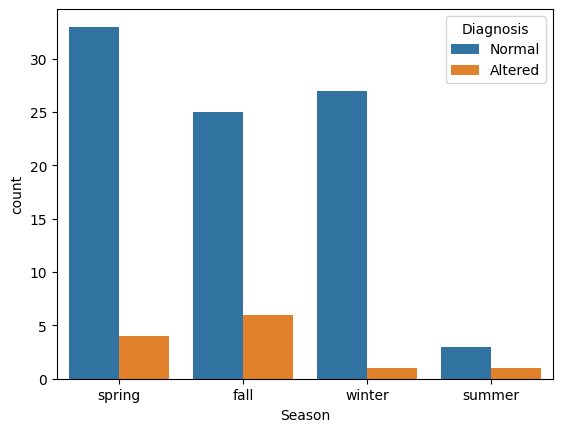

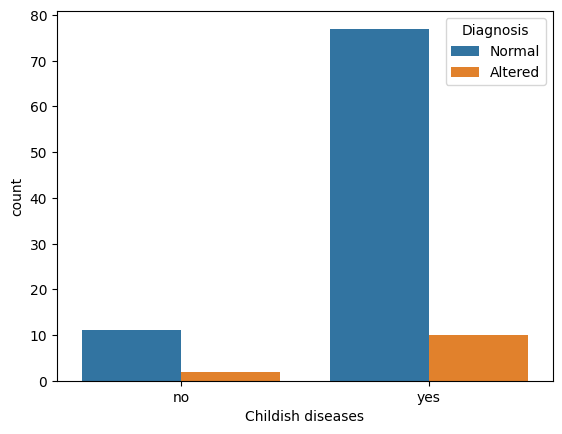

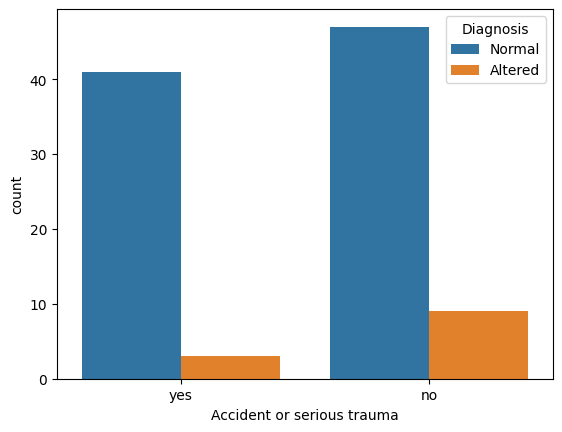

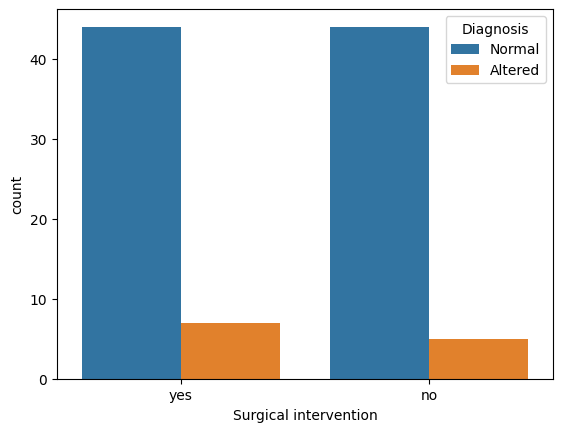

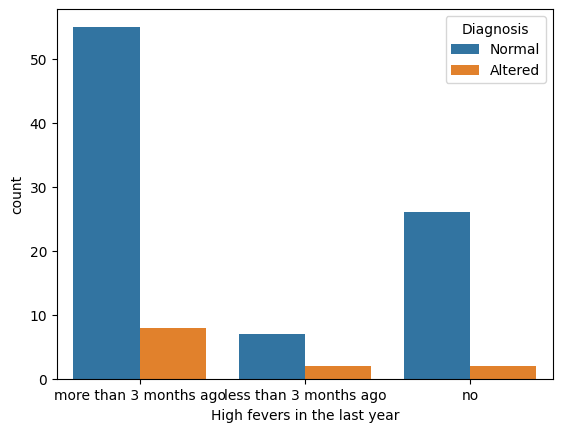

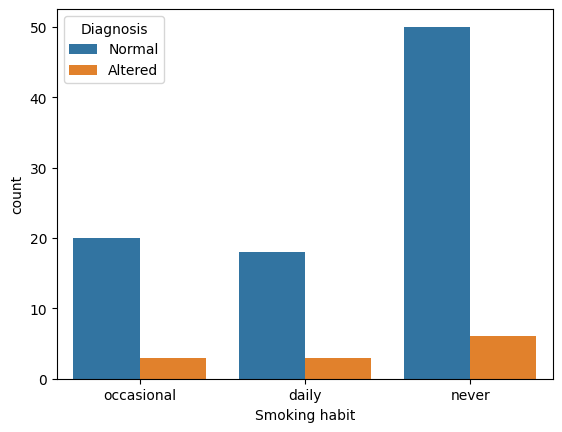

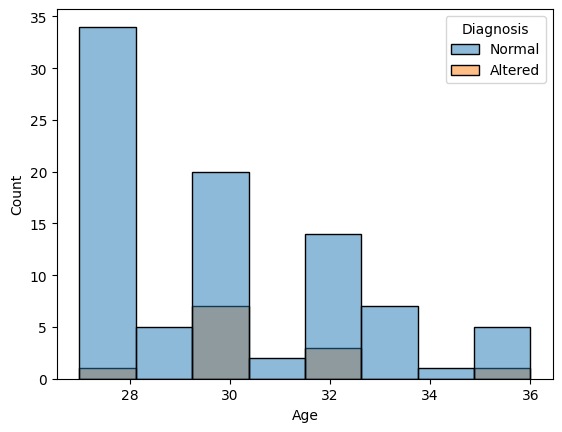

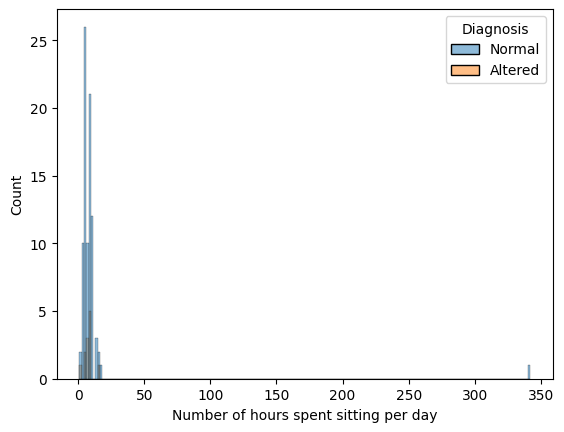

In [ ]:
if target_column_name in df:
    if df[target_column_name].dtype == 'O':  # Check if the target column is categorical
        for column in categorical_columns:
            if column != target_column_name:
                sns.countplot(x=column, hue=target_column_name, data=df)
                plt.show()

        for column in numeric_columns:
            if column != target_column_name:
                sns.histplot(x=column, hue=target_column_name, data=df)
                plt.show()

    else:  # If target column is numeric
        for column in categorical_columns:
            if column != target_column_name:
                sns.histplot(x=target_column_name, hue=column, data=df)
                plt.show()

        for column in numeric_columns:
            if column != target_column_name:
                sns.scatterplot(x=target_column_name, y=column, data=df)
                plt.show()
else:
    print(f"Target column '{target_column_name}' not found in the DataFrame.")


OBSERVATION

---


1.Diagonosis vs Season:
It is seen that most men whose ferility is altered are given there data in fall season and in winter less men's fertility is altered in fertility.

2.Diagonosis vs Childish trauma and accidents or serious trauma:
It is ovserved that most men whose fertility is altered had childish disease and accidents or serious trauma.

3.Diagonosis vs Age:
Most men whose age is above equal are above 30 have altered diagonosis

4.Diagonosis vs Smoking habit:
Men who never smokes are most likely have both normal and altered diagonosis.That means, smoking habits are not concerning here.

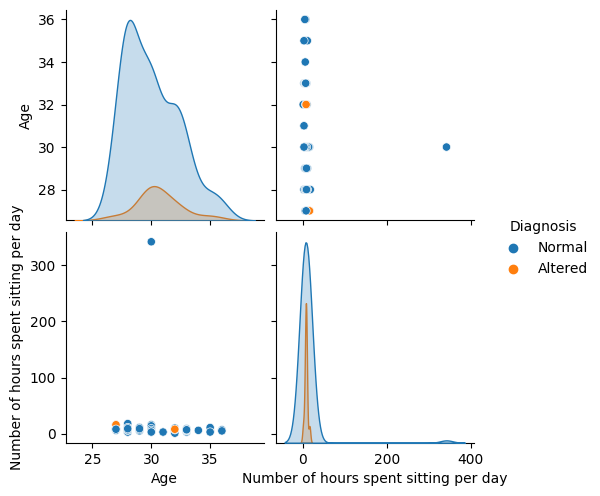

In [ ]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

OBSERVATION

Age:

The altered diagonosis has platykurtic curve and normal diagonosis has leptokurtic curve.

Number of hours sitting per day:
The both normal and altered diagonosis has platykurtic curve which is because the data of number of hours sitting per day is between 7-15 hours.

Age vs number of hours sitting per day:

Mostly 30-35 age's people are sitting and altered diagonosis is most in betweeen this.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-null    object
 6   Frequency of alcohol consumption       100 non-null    object
 7   Smoking habit                          100 non-null    object
 8   Number of hours spent sitting per day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


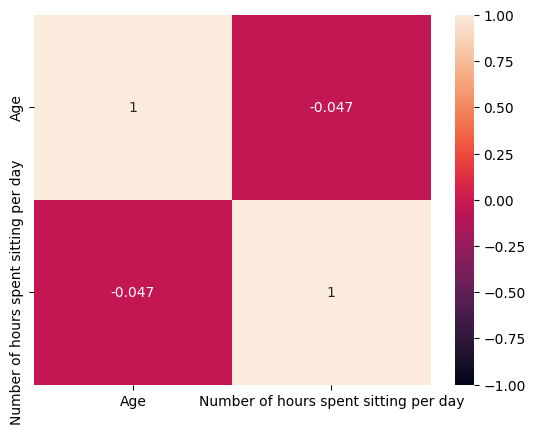

In [ ]:
#Correlation HeatMap for numeric columns among the dataset

numeric_df = df.select_dtypes('number')
sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()


A moderately significant association between age and hours spent sitting each day shows that individuals in specific age groups tend to spend more time sitting as they get older. A moderate negative association, on the other hand, implies that, in some age groups, individuals may experience a drop in the amount of hours spent sitting as they age. This mixed association suggests that the impact of age on sitting time varies between age groups, showing a more nuanced pattern in the dataset.


In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       0.90      1.00      0.95        27

    accuracy                           0.90        30
   macro avg       0.95      0.50      0.47        30
weighted avg       0.91      0.90      0.85        30



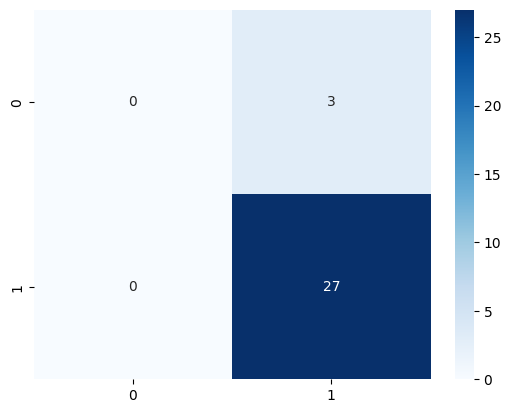

Recall Scores for Each Diagnosis: [0. 1.]


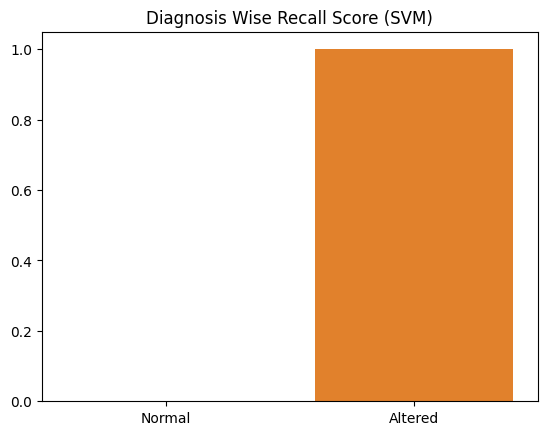

Precision Scores for Each Diagnosis: [1.  0.9]


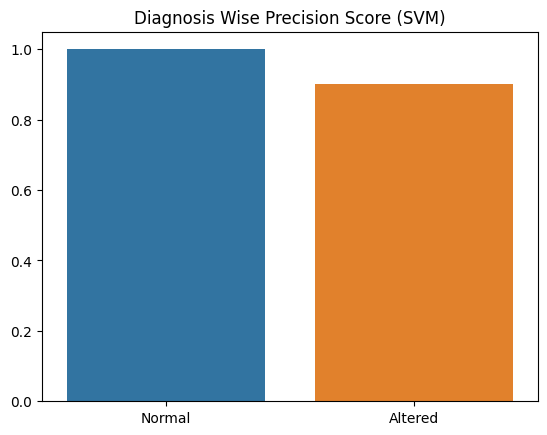

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

categorical_target_column = True  # Set to False if the target column is numeric

if categorical_target_column:
    clf = SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(classification_report(y_test, y_pred, zero_division=1))

    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

    # Debugging Recall Scores
    recall_scores = recall_score(y_test, y_pred, average=None, zero_division=1)
    print("Recall Scores for Each Diagnosis:", recall_scores)

    # Display Recall Scores
    sns.barplot(x=target_class, y=recall_scores)
    plt.title("Diagnosis Wise Recall Score (SVM)")
    plt.show()

    # Debugging Precision Scores
    precision_scores = precision_score(y_test, y_pred, average=None, zero_division=1)
    print("Precision Scores for Each Diagnosis:", precision_scores)

    # Display Precision Scores
    sns.barplot(x=target_class, y=precision_scores)
    plt.title("Diagnosis Wise Precision Score (SVM)")
    plt.show()

else:
    print("You need to use Linear Regression as your target column is numeric.")



In the context of medical diagnosis, the model exhibits excellent precision for altered diagnoses, correctly identifying a substantial portion of cases. However, for normal diagnoses, the precision is perfect, but the recall is non-existent, indicating the model's failure to identify any instances of normal diagnoses. Consequently, the F1-score is heavily influenced by the low recall for normal diagnoses. While the overall accuracy is relatively high, it's crucial to consider the class-specific metrics to understand the model's strengths and weaknesses, particularly its challenge in identifying instances of normal diagnoses.

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.92      0.85      0.88        27

    accuracy                           0.80        30
   macro avg       0.56      0.59      0.57        30
weighted avg       0.85      0.80      0.82        30



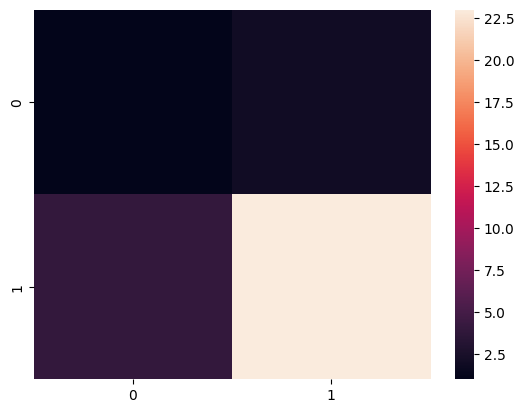

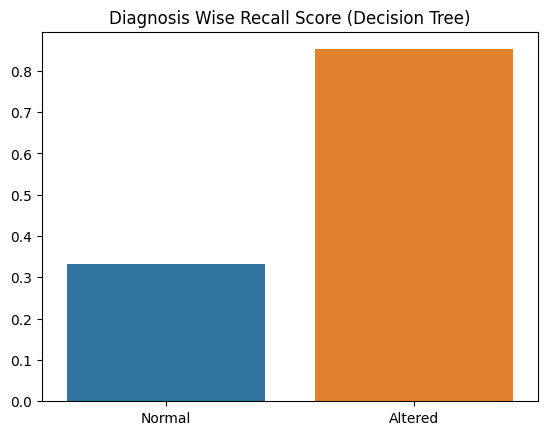

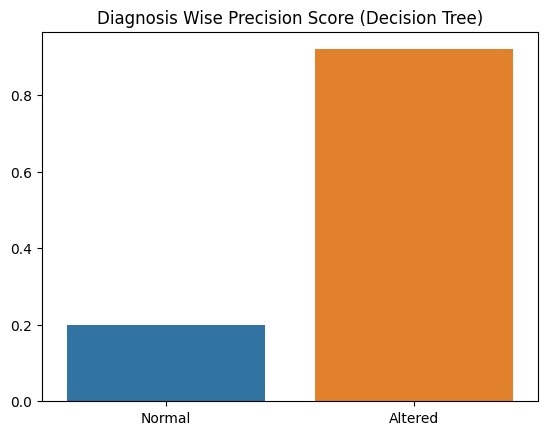

In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Diagnosis Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Diagnosis Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

The decision tree model exhibited exceptional accuracy (93%), showcasing notable precision and recall for both classes. Precision for class 0(Normal)was perfect which is 100%, although recall was relatively low which is 33%. Conversely, for class 1, precision was slightly lower which is 93%, but recall was perfect which is 100%. The overall F1-score was impressive, with a balanced trade-off between precision and recall across the dataset.